## Observations and Insights 

### 1) Capomulin Performance
* Capomulin and Ramicane with means in the 40-41 mm3 range, which are the two lowest means for any treatement.
* The boxplots help to really visualize that tumor volumes for Capomulin and Ramicane are superior (lower) to the tumor volumes of mice on Infubinol and Ceftamin. Capomulin appears to result in lower tumor volumes and performs similarly to Ramicane to reduce tumor volumes.

### 2) Correlation between Tumor Volume & Mouse Weight
* There is a strong correlation between Tumor Volumne and Mouse Weigth with a correlation coefficient of 0.84.
* Mice with higher weight, measured in grams, had tumors with greater volumes vs mice with lower weights. For every 0.95 grams one can expect the tumor volume to increase by approximately 21.55 mm3. 

### 3) Individual Mouse on Capomulin
* For the randomly selected mouse, ID# s185, from the capomulin group we see a negative correlation between tumor volume and time point. As the time point increased the tumor volume decreased in a fairly linear fashion for mouse subject s185. This subject seemed to benefit from the Capomulin treatment by signficantly reducing the tumor volume over the course of 45 days.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_mouse_results = mouse_metadata.merge(study_results, how="outer", on=["Mouse ID"], left_index=True)
raw_mouse_results.sort_index(inplace=True)
# Display the data table for preview
raw_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
num_mice = pd.DataFrame({"# Mice": raw_mouse_results[["Mouse ID"]].nunique()})
num_mice = num_mice.reset_index()
del num_mice["index"]
num_mice

,# Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Tag mice with duplicate data based on "Mouse ID" & "Timepoint" 
raw_mouse_results["Duplicate?"] = raw_mouse_results.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
# View duplicates
duplicate_filter = raw_mouse_results.loc[raw_mouse_results["Duplicate?"] == True]
duplicate_filter

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
107,g989,Propriva,Female,21,26,0,45.000000,0,True
137,g989,Propriva,Female,21,26,0,45.000000,0,True
329,g989,Propriva,Female,21,26,5,48.786801,0,True
360,g989,Propriva,Female,21,26,5,47.570392,0,True
620,g989,Propriva,Female,21,26,10,51.745156,0,True
681,g989,Propriva,Female,21,26,10,49.880528,0,True
815,g989,Propriva,Female,21,26,15,51.325852,1,True
869,g989,Propriva,Female,21,26,15,53.442020,0,True
950,g989,Propriva,Female,21,26,20,55.326122,1,True
1111,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID.  
duplicate_mouse_data = raw_mouse_results.drop(raw_mouse_results[raw_mouse_results["Mouse ID"]!="g989"].index)
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
107,g989,Propriva,Female,21,26,0,45.000000,0,True
137,g989,Propriva,Female,21,26,0,45.000000,0,True
329,g989,Propriva,Female,21,26,5,48.786801,0,True
360,g989,Propriva,Female,21,26,5,47.570392,0,True
620,g989,Propriva,Female,21,26,10,51.745156,0,True
681,g989,Propriva,Female,21,26,10,49.880528,0,True
815,g989,Propriva,Female,21,26,15,51.325852,1,True
869,g989,Propriva,Female,21,26,15,53.442020,0,True
950,g989,Propriva,Female,21,26,20,55.326122,1,True
1111,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Delete all data for the mouse with duplicate data

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = raw_mouse_results.drop(raw_mouse_results[raw_mouse_results["Mouse ID"]=="g989"].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
0,b128,Capomulin,Female,9,22,0,45.000000,0,False
1,f932,Ketapril,Male,15,29,0,45.000000,0,False
2,g107,Ketapril,Female,2,29,0,45.000000,0,False
3,a457,Ketapril,Female,11,30,0,45.000000,0,False
4,c819,Ketapril,Male,21,25,0,45.000000,0,False
...,...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2,False
1889,u364,Capomulin,Male,18,17,45,31.023923,3,False
1890,p438,Ceftamin,Female,11,26,45,61.433892,1,False
1891,x773,Placebo,Female,21,30,45,58.634971,4,False


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = pd.DataFrame({"#Mice":clean_df[["Mouse ID"]].nunique()})
num_mice2 = num_mice2.reset_index()
del num_mice2["index"]
num_mice2

,#Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

In [8]:
# Create data frame with "Drug Regimen" & "Tumor Volume (mm3)"
drug_tumor_data = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Groupby isloates "Drug Regimen" to perform stats on "Tumor Volume". Pass all equations to the dataframe with .agg()
stats_table = drug_tumor_data.groupby(["Drug Regimen"]).agg(["count","mean","median",pd.Series.mode,"var","std","sem"])
stats_table.columns = stats_table.columns.get_level_values(1)
stats_table.sort_values(by="mean")

,count,mean,median,mode,var,std,sem
Drug Regimen,,,,,,,
Ramicane,228,40.216745,40.673236,45.0,23.486704,4.846308,0.320955
Capomulin,230,40.675741,41.557809,45.0,24.947764,4.994774,0.329346
Propriva,148,52.320930,50.446266,45.0,43.852013,6.622085,0.544332
Ceftamin,178,52.591172,51.776157,45.0,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,45.0,43.128684,6.567243,0.492236
Zoniferol,182,53.236507,51.818479,45.0,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,45.0,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,45.0,59.450562,7.710419,0.573111
Naftisol,186,54.331565,52.509285,45.0,66.173479,8.134708,0.596466


## Bar and Pie Charts

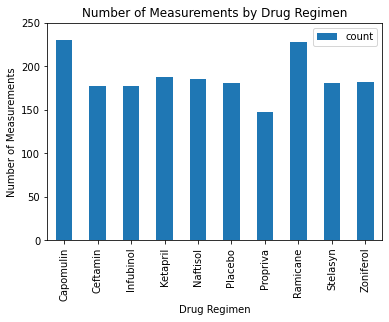

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
treatment_counts = stats_table[["count"]]
treatment_counts.plot(kind="bar")

# Plot titles and labels
plt.title("Number of Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.ylim(0, 250)
plt.show()

In [10]:
treatment_counts[["count"]]

,count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


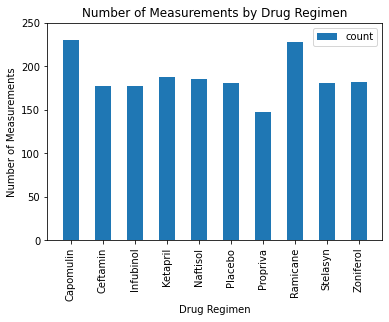

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_y = treatment_counts["count"]
bar_x = treatment_counts.index
legend_d = treatment_counts[["count"]]
plt.bar(bar_x, bar_y, width=0.5)
plt.xticks(rotation="vertical")
plt.ylim(0,250)

# Plot title and labels
plt.title("Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.legend(legend_d, loc=0)
plt.show()

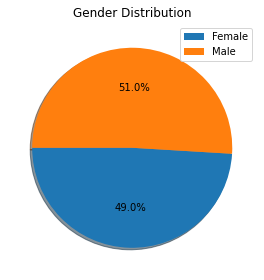

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex"])
gender_stats = gender_group["Sex"].count()

# Generate pie from .plot()
gender_stats.plot(kind="pie", figsize=(4.6,4.6),labels=None, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Gender Distribution")
plt.ylabel("")
plt.legend(gender_stats.index, loc=0)
plt.show()

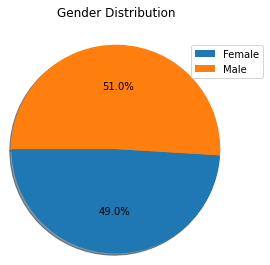

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = gender_stats.index

plt.pie(gender_stats,
        autopct="%1.1f%%", shadow=True, startangle=180, radius=1.2)
plt.title("Gender Distribution", y=1.08)
plt.legend(gender,bbox_to_anchor=(1.2,1),loc=1)
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Obtain last timepoint for each mouse
max_timepoint = clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
max_timepoint_group = max_timepoint.groupby(["Mouse ID"])
max_timepoint = max_timepoint_group[["Timepoint"]].max().reset_index()
max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [15]:
# Merge max timepoint dataframe with clean_df to obtain tumor volume at the max timepoint
max_timepoint_tumor = max_timepoint.merge(clean_df,on=["Mouse ID","Timepoint"],how="left")
max_timepoint_tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicate?
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
2,a262,45,Placebo,Female,17,29,70.717621,4,False
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
4,a366,30,Stelasyn,Female,16,29,63.440686,1,False
...,...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0,False
244,z578,45,Ramicane,Male,11,16,30.638696,0,False
245,z581,45,Infubinol,Female,24,25,62.754451,3,False
246,z795,45,Naftisol,Female,13,29,65.741070,3,False


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_group = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
l_outliers = []
u_outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_group:
    timepoint_tumor_filter = max_timepoint_tumor.loc[max_timepoint_tumor["Drug Regimen"] == treatment,
                            "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(timepoint_tumor_filter)
    
    # Determine outliers using upper and lower bounds
    quartiles = timepoint_tumor_filter.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # Capture outliers in a list     
    l_outliers = [value for value in timepoint_tumor_filter if value < lower_bound]
    u_outliers = [value for value in timepoint_tumor_filter if value > upper_bound]
    # Format lists    
    l_outliers_format = [round(outlier,2) for outlier in l_outliers]
    u_outliers_format = [round(outlier,2) for outlier in u_outliers]
    # Print statements to tell the user if outliers exist or not in each treatment group     
    if not l_outliers and not u_outliers:
        print(f"{treatment} does not have detectable outliers")
    elif l_outliers:
        print(f"{treatment} outlier(s) {l_outliers_format} are below the lower bound.")
    elif u_outliers:
        print(f"{treatment} outlier(s) {u_outliers_format} are above the upper bound.")

Capomulin does not have detectable outliers
Ramicane does not have detectable outliers
Infubinol outlier(s) [36.32] are below the lower bound.
Ceftamin does not have detectable outliers


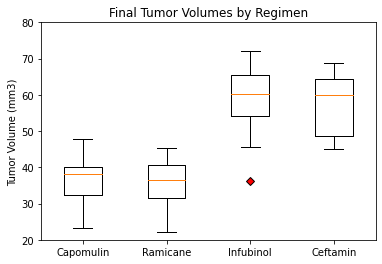

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# variable to change marker color and shape 
red_square = dict(markerfacecolor='r', marker='D')

# Generate boxplot
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes by Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data,flierprops=red_square)
ax1.set_xticklabels(treatment_group)
plt.ylim(20,80)
plt.show()

## Line and Scatter Plots

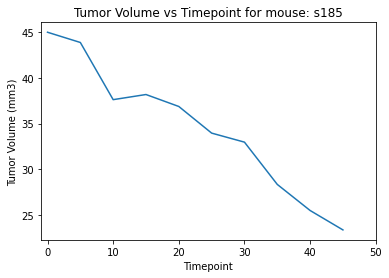

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_ID = "s185"
# Create x & y axis data for a mouse from the capomulin group
capomulin = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]== mouse_ID]
x_capomulin_line = capomulin_mouse["Timepoint"]
y_capomulin_line = capomulin_mouse["Tumor Volume (mm3)"]

# Generate line plot
plt.plot(x_capomulin_line, y_capomulin_line)
# Labels for plot
plt.title(f"Tumor Volume vs Timepoint for mouse: {mouse_ID}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
# Adjust x_axis limits
plt.xlim(-1,y_capomulin_line.max()+5)
plt.show()

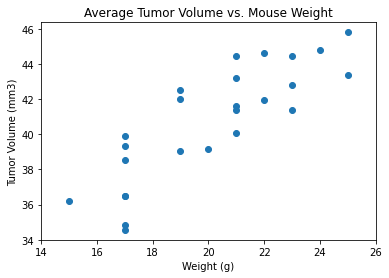

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe to obtain average tumor volume's for capomulin group
capomulin_group = capomulin.groupby(["Mouse ID"])
capomulin_avg = capomulin_group[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]].agg("mean")
# Generate scatter plot
x_capomulin_scat = capomulin_avg["Weight (g)"]
y_capomulin_scat = capomulin_avg["Tumor Volume (mm3)"]
plt.scatter(x_capomulin_scat, y_capomulin_scat)
# Labels
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Adjust x axis limits
plt.xlim(14,26)
plt.show()

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [21]:
# correlation coefficient for capomulin treatment: mouse weight vs avg tumor volume
x_mouse_wt = capomulin_avg["Weight (g)"]
y_avg_tumor_vol = capomulin_avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_capomulin_scat,y_capomulin_scat)
print(f"The correlation coefficient between mouse weight & average tumor volumne is {round(correlation[0],2)}")

The correlation coefficient between mouse weight & average tumor volumne is 0.84


The r-squared is: 0.7088568047708717


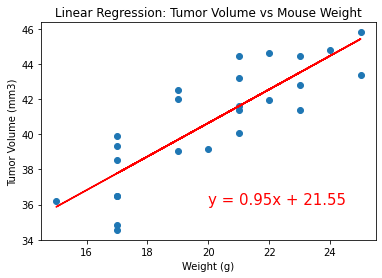

In [22]:
# Linear regression model: mouse weight vs avg tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_mouse_wt, y_avg_tumor_vol)
regress_values = x_mouse_wt * slope + intercept
# Generate linear regression equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Generate scatter plot
plt.scatter(x_mouse_wt,y_avg_tumor_vol)
plt.plot(x_mouse_wt,regress_values,"r-")
# Add line equation to graph & format
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# Name axes
plt.title("Linear Regression: Tumor Volume vs Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")